<a href="https://colab.research.google.com/github/Ayesha656/ConvexHull-Advancement/blob/main/algo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

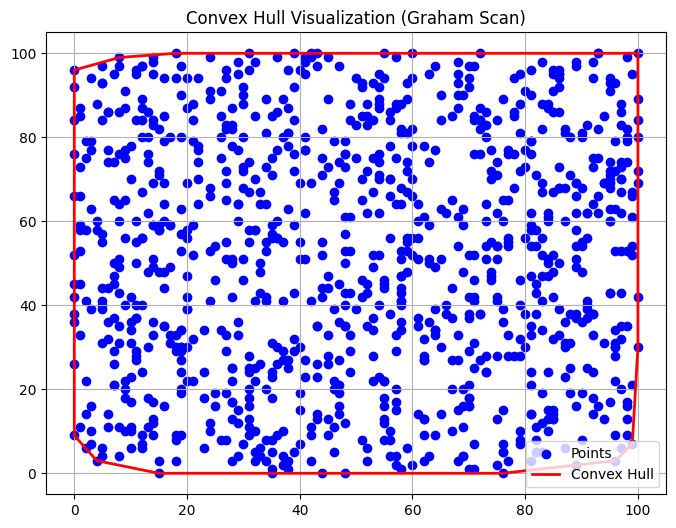

In [22]:
import matplotlib.pyplot as plt
import random

def is_left_turn(p1, p2, p3):
    """Check orientation: return True if left turn"""
    return (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0]) > 0

def graham_scan(points):
    """Compute convex hull using Graham scan algorithm."""
    points = sorted(set(points))
    if len(points) <= 1:
        return points

    lower = []
    for p in points:
        while len(lower) >= 2 and not is_left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)

    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and not is_left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)

    return lower[:-1] + upper[:-1]

def plot_convex_hull(points, hull):
    x, y = zip(*points)
    hx, hy = zip(*(hull + [hull[0]]))  # Close the polygon
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', label='Points')
    plt.plot(hx, hy, 'r-', lw=2, label='Convex Hull')
    plt.title("Convex Hull Visualization (Graham Scan)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate random points
random.seed(42)
points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(1000)]

# Compute and plot convex hull
hull = graham_scan(points)
plot_convex_hull(points, hull)


Saving datasetcs.csv to datasetcs (1).csv


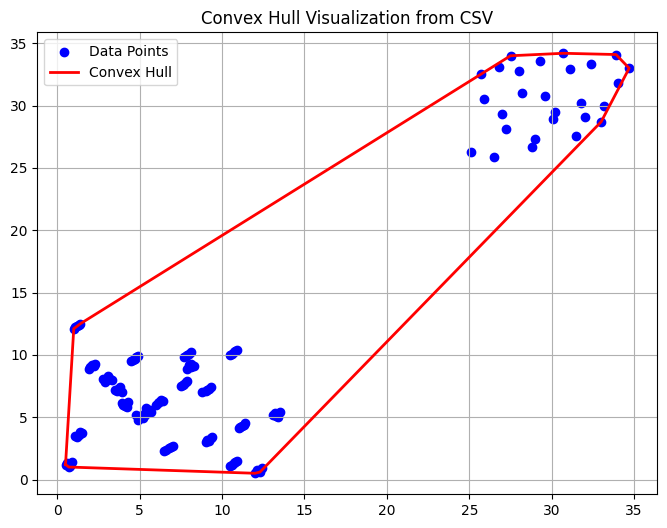

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Convex Hull Functions
def is_left_turn(p1, p2, p3):
    return (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0]) > 0

def graham_scan(points):
    points = sorted(set(points))
    if len(points) <= 1:
        return points

    lower, upper = [], []
    for p in points:
        while len(lower) >= 2 and not is_left_turn(lower[-2], lower[-1], p):
            lower.pop()
        lower.append(p)
    for p in reversed(points):
        while len(upper) >= 2 and not is_left_turn(upper[-2], upper[-1], p):
            upper.pop()
        upper.append(p)
    return lower[:-1] + upper[:-1]

def plot_convex_hull(points, hull):
    x, y = zip(*points)
    hx, hy = zip(*(hull + [hull[0]]))
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', label='Data Points')
    plt.plot(hx, hy, 'r-', lw=2, label='Convex Hull')
    plt.title("Convex Hull Visualization from CSV")
    plt.legend()
    plt.grid(True)
    plt.show()

# Upload file from local
uploaded = files.upload()

# Process uploaded file
for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    if 'x' in df.columns and 'y' in df.columns:
        points = list(zip(df['x'], df['y']))
        hull = graham_scan(points)
        plot_convex_hull(points, hull)
    else:
        print("Error: The file must contain 'x' and 'y' columns.")
